In [1]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import numpy as np
import os

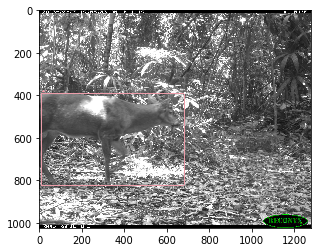

In [2]:
im = cv2.imread('C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\test\\8714ce80-21bc-11ea-a13a-137349068a90.jpg')
#im = cv2.imread(trainFiles[0])
bbox, label, conf = cv.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)
plt.imshow(output_image)
plt.show()




In [3]:
print(bbox)
print(label)
print(conf)

[[11, 393, 683, 823]]
['cow']
[0.9091830849647522]


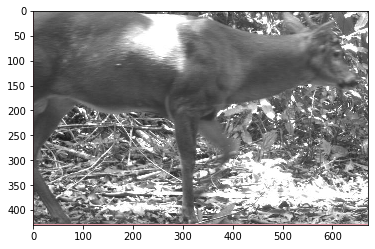

In [4]:

if(conf==[]):
    plt.imshow(im)
else:
    maxConf=np.argmax(conf)
    x,y,w,h = bbox[maxConf]
    plt.imshow(im[y:h,x:w])
plt.show()

In [11]:
rootPath="C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\"

#def getFileNames(path):
#    i=0
#    files=[]
#    for dirname, _, filenames in os.walk(path):
#            for filename in filenames:
#                #if(i<10):
#                #print(os.path.join(dirname, filename))
#                files.append(os.path.join(dirname, filename))
#                i=i+1
#                #else:
#                #    break
#                
#    print(str(i)+" files found!")
#    return files

def getFileNames(path):
    #return [os.path.join(path,f) for f in os.listdir(path) if os.path.isfile(os.path.join(path,f))]
    return [os.path.join(path,entry) for entry in os.scandir(path) if entry.is_file()]


testFiles = getFileNames(rootPath+"test")
trainFiles = getFileNames(rootPath+"train\\400X400")

#62894 files found!
#296155 files found!

In [25]:
#with os.scandir(rootPath+"train") as it:
#    for entry in it:
#        if not entry.name.startswith('.') and entry.is_file():
#            print(entry.name)


['C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\train\\86760c00-21bc-11ea-a13a-137349068a90.jpg',
 'C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\train\\8676197a-21bc-11ea-a13a-137349068a90.jpg',
 'C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\train\\86762118-21bc-11ea-a13a-137349068a90.jpg',
 'C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\train\\86762d0c-21bc-11ea-a13a-137349068a90.jpg',
 'C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\train\\867630d6-21bc-11ea-a13a-137349068a90.jpg',
 'C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\train\\867634be-21bc-11ea-a13a-137349068a90.jpg',
 'C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\train\\8676382e-21bc-11ea-a13a-137349068a90.jpg',
 'C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-2020\\train\\86763fb8-21bc-11ea-a13a-137349068a90.jpg',
 'C:\\Users\\manoj\\PycharmProjects\\tf-tuto\\data\\iwildcam-202

In [14]:
testFiles = getFileNames(rootPath+"test")
trainFiles = getFileNames(rootPath+"train")


In [15]:
len(trainFiles)
#len(testFiles)


217960

In [7]:
def findObject(imgPath):
    found=0
    im = cv2.imread(imgPath)
    bbox, label, conf = cv.detect_common_objects(im)
    #output_image = draw_bbox(im, bbox, label, conf)
    #plt.imshow(output_image)
    #plt.show()
    #print(bbox)
    #print(label)
    #print(conf)
    if(conf==[]):
        #plt.imshow(im)
        found=0
    else:
        #maxConf=np.argmax(conf)
        #x,y,w,h = bbox[maxConf]
        #plt.imshow(im[y:h,x:w])
        found=1
    #plt.show()
    return found



In [16]:
findObject(trainFiles[6])

1

In [17]:
images=0
for file in trainFiles:
    images=images+findObject(file)


KeyboardInterrupt: 

In [18]:
print(images)

4


In [210]:


filetoProcess = trainFiles[6]

#image.thumbnail((400, 400))
#image.show()



In [19]:

from PIL import Image, ImageOps
import cv2

def detectAndResize(filetoProcess):
    ##Resizing Images using Pillow
    import cvlib as cv
    if(os.path.exists(rootPath+"/train/400X400/"+os.path.basename(filetoProcess))==False):
        image = Image.open(filetoProcess)
        im = cv2.imread(filetoProcess)
        bbox, label, conf = cv.detect_common_objects(im)
        if(conf==[]):
            found=0
        else:
            maxConf=np.argmax(conf)
            x,y,w,h = bbox[maxConf]
            #plt.imshow(im[y:h,x:w])
            found=1
            box = (x, y, w, h)
            image = image.crop(box)

        image.thumbnail((400, 400))
        w,h=image.size

        padding = (0, 0, 400-w, 400-h)
        image = ImageOps.expand(image, padding)
        image.save(rootPath+"/train/400X400/"+os.path.basename(filetoProcess))

#image.show()

In [ ]:
for file in trainFiles:
    try:
        detectAndResize(file)
    except:
        print("Issue with file " + file)

Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\87022118-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\8792549a-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\88007592-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\88313344-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\883572ba-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\896c1198-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\8c3a31fc-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\PycharmProjects\tf-tuto\data\iwildcam-2020\train\8c53e822-21bc-11ea-a13a-137349068a90.jpg
Issue with file C:\Users\manoj\P

In [228]:
os.path.exists(rootPath+"/train/400X400/"+os.path.basename(filetoProcess))

True